# Posttest 6 Unsupervised Learning

In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("final_cars_datasets.csv")
df.head()

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


## Disini data dikecilkan agar dapat memprediksi secara akurat, namun model machine learning hanya bisa memprediksi 3 model mobil yaitu Toyota Passo, Toyota Vitz dan Honda fit

In [4]:
model_mobil = df['model'].isin(['vitz','fit','passo'])

df = df[model_mobil]
df.head() 

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
20,22,290,toyota,passo,2007,112700,1000,at,2wd,rhd,gasoline
22,24,290,toyota,passo,2009,92800,1000,at,2wd,rhd,gasoline
25,27,300,toyota,passo,2007,147933,990,at,2wd,rhd,gasoline
36,38,345,toyota,passo,2007,90066,1000,at,2wd,rhd,gasoline
40,42,350,toyota,passo,2010,134700,1000,at,2wd,rhd,gasoline


## Data Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
standardscaler = StandardScaler()

In [93]:
df_set = df[['price','engine_capacity']]

In [94]:
x_scaled = standardscaler.fit_transform(df_set)

## K Means

In [95]:
from sklearn.cluster import KMeans

In [96]:
modelKm = KMeans(n_clusters = 3, random_state = 0)

In [97]:
model = modelKm.fit_predict(x_scaled)

## Visualisasi Model KMeans

### Centroid KMeans

In [98]:
import matplotlib.pyplot as plt

In [99]:
centroids = modelKm.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

### Visualisasi

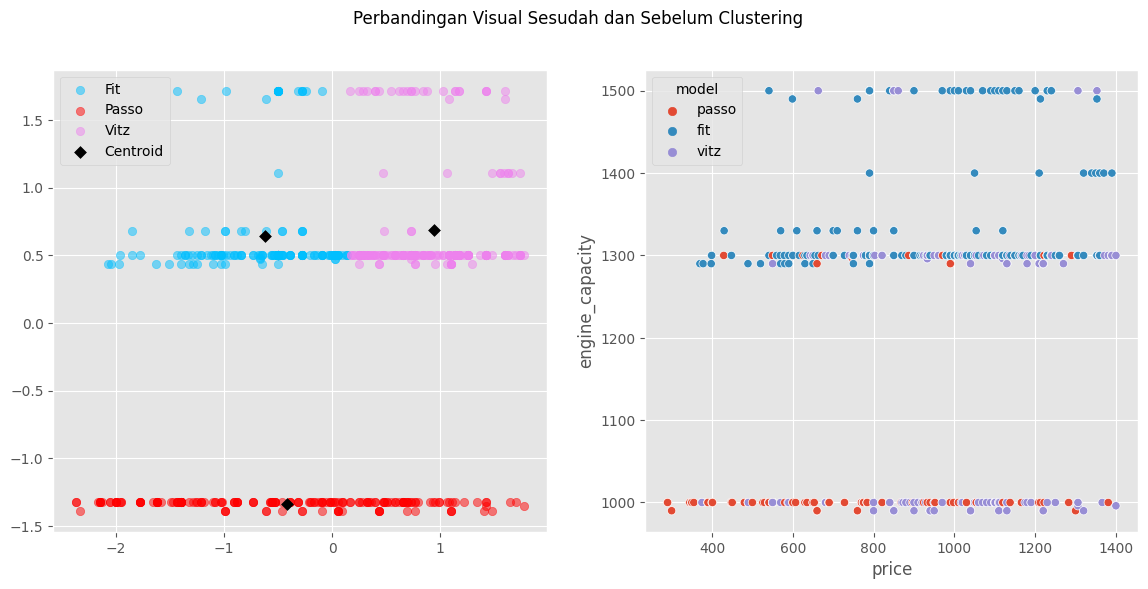

In [100]:
plt.figure(figsize = (14,6))

plt.suptitle("Perbandingan Visual Sesudah dan Sebelum Clustering")

plt.subplot(1,2,1)
plt.scatter(x_scaled[model == 0,0],
            x_scaled[model == 0,1],
            alpha = 0.5, c = 'deepskyblue',
            label = 'Fit')

plt.scatter(x_scaled[model == 1,0],
            x_scaled[model == 1,1],
            alpha = 0.5, c = 'red',
            label = 'Passo')

plt.scatter(x_scaled[model == 2,0],
            x_scaled[model == 2,1],
            alpha = 0.5, c = 'violet',
            label = 'Vitz')

plt.scatter(centroids_x, centroids_y,
           label = 'Centroid',c = 'black', marker = 'D')
plt.legend()

plt.subplot(1,2,2)

dfaktual = df[['price','engine_capacity','model']]
sns.scatterplot(data = dfaktual, x = 'price',y = 'engine_capacity', hue = 'model')

plt.show()